<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/no_converge_vectorGradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
blood_pressure_data = np.array([
    [52, 173, 132],
    [59, 184, 143],
    [67, 194, 153],
    [73, 211, 162],
    [64, 196, 154],
    [74, 220, 168],
    [54, 188, 137],
    [61, 188, 149],
    [65, 207, 159],
    [46, 167, 128],
    [72, 217, 166]
])

In [4]:
data1 = pd.DataFrame(blood_pressure_data,columns=["age","weight","Sist"])
data1.head()

,age,weight,Sist
0,52,173,132
1,59,184,143
2,67,194,153
3,73,211,162
4,64,196,154


## Cost Function
Resulta que para crear la mejor línea para modelar los datos, queremos elegir parámetros $\beta$ que permitan que nuestro valor predicho sea lo más cercano posible al valor real. En otras palabras, queremos que se minimice la distancia  entre nuestra hipótesis $h(x)$ e y.

Entonces definimos formalmente una función de costo usando mínimos cuadrados ordinarios que es simplemente la suma de las distancias al cuadrado. Para encontrar la recta de regresión lineal, minimizamos:
$$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$

Nuevamente la hipótesis que estamos tratando de encontrar viene dada por el modelo lineal:
$$h_\beta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$

Los parámetros del modelo son los valores beta. Ajustamos $\beta_j$ para minimizar la función de coste $J(\beta)$.

Y podemos usar el descenso de gradiente por lotes donde cada iteración realiza la actualización.
$$\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)}) x_{j}^{(i)}$$

Estamos intentando encontrar el mínimo local en esta función. Si comenzamos en el primer punto rojo en x = 2, encontramos el gradiente (derivada) y nos movemos en su contra. En este caso, la pendiente es negativa. Y como la pendiente es negativa, nuestro próximo intento es más hacia la derecha. Acercándonos así al mínimo.

De hecho, seguimos actualizando nuestro parámetro beta para acercarnos cada vez más al mínimo.
$$\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)$$
Donde $\alpha$ es nuestra tasa de aprendizaje y $J(\beta)$ es nuestra función de costos. Al ajustar alfa, podemos cambiar la rapidez con la que convergemos al mínimo (a riesgo de sobrepasarlo por completo y no converger a nuestro mínimo local).

¿Deducir la fórmula final?

Bien, intentemos implementar esto en Python. Primero declaro algunos parámetros. Alfa es mi tasa de aprendizaje y las iteraciones definen cuántas veces quiero realizar la actualización.

Luego transformo el marco de datos que contiene mis datos en una matriz para obtener matemáticas matriciales más simples. Y luego escriba una función auxiliar para calcular la función de costo como se define anteriormente. Usando np.dot para la multiplicación de matrices internas

In [29]:
## Split population and profit into X and y

data1['intercept'] = 1
X_df = data1[["intercept","age","weight"]]
y_df = pd.DataFrame(data1.Sist)

## Length, or number of observations, in our data
m = len(y_df)

In [41]:
## Add a columns of 1s as intercept to X


## Transform to Numpy arrays for easier matrix math and start theta at 0
X = np.array(X_df)
y = np.array(y_df)
theta = np.array([0, 0,0])

In [42]:
X

array([[  1,  52, 173],
       [  1,  59, 184],
       [  1,  67, 194],
       [  1,  73, 211],
       [  1,  64, 196],
       [  1,  74, 220],
       [  1,  54, 188],
       [  1,  61, 188],
       [  1,  65, 207],
       [  1,  46, 167],
       [  1,  72, 217]])

In [43]:
y

array([[132],
       [143],
       [153],
       [162],
       [154],
       [168],
       [137],
       [149],
       [159],
       [128],
       [166]])

In [61]:
theta=theta.reshape(3,1)
theta

array([[0],
       [0],
       [0]])

In [56]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y)

    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/(2*m)

    return J

In [57]:
cost_function(X, y, theta)

11348.045454545454

Ahora, divido el algoritmo de descenso de gradiente en 4 partes para poder ver qué está pasando. Además, me gusta comprobar las dimensiones de mi matriz para asegurarme de que estoy haciendo los cálculos en el orden correcto.
1. calcular la hipótesis[97x1] = x[97x2] * theta[2x1]
2. calcular la pérdida [97x1] con resta de elementos
3. calcular el gradiente [2x1] = X' [2x97] * pérdida [97*1]
4. actualice el parámetro theta [2x1] después de la resta de elementos multiplicada por un escalar
5. encuentre el costo usando cost_function()

In [68]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations

    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y

        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        print("cost",cost)
        cost_history[iteration] = cost

    return theta, cost_history


In [69]:
iterations = 4
alpha = 0.01

In [70]:
(t, c) = gradient_descent(X,y,theta,alpha, iterations)

cost 2016363522.5811813
cost 358396533396519.56
cost 6.370283629553482e+19
cost 1.1322797443484312e+25


In [ ]:
## Print theta parameters
print (t)

[ 1.16636235 -3.63029144]


In [ ]:
## Prediction
print (np.array([3.5, 1]).dot(t))
print (np.array([7, 1]).dot(t))

0.4519767867701767
4.534245012944714


In [ ]:
## Plotting the best fit line
best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

Text(0.5, 1.0, 'Profit vs. Population with Linear Regression Line')

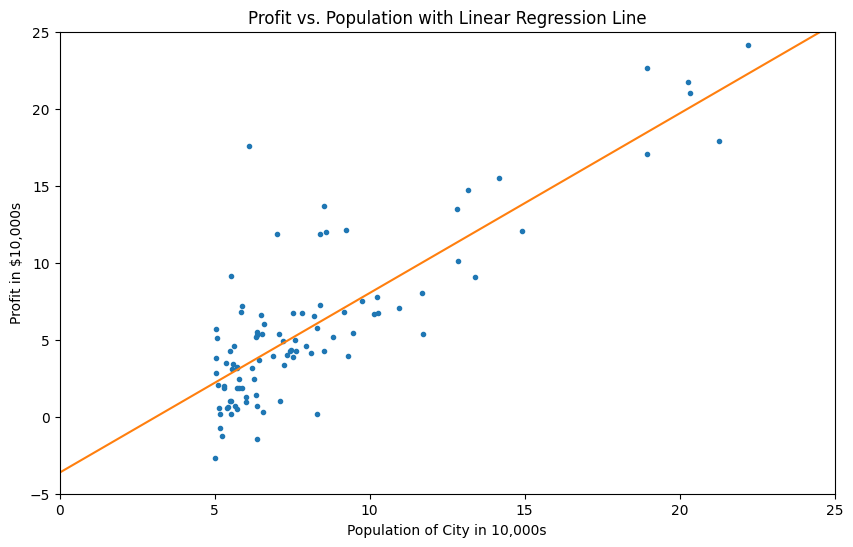

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X_df.Poblacion, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs. Population with Linear Regression Line')